# Linear Regression

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Loading the Data

In [11]:
#dataset = pd.read_csv("winequality-red.csv", sep=';')


column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('boston.csv', delimiter=r"\s+")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


There are 14 attributes in each case of the dataset. They are:

 -   CRIM - per capita crime rate by town
 -   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 -   INDUS - proportion of non-retail business acres per town.
 -   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 -   NOX - nitric oxides concentration (parts per 10 million)
 -   RM - average number of rooms per dwelling
 -   AGE - proportion of owner-occupied units built prior to 1940
 -   DIS - weighted distances to five Boston employment centres
 -   RAD - index of accessibility to radial highways
 -   TAX - full-value property-tax rate per \$10,000
 -   PTRATIO - pupil-teacher ratio by town
 -   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 -   LSTAT - % lower status of the population
 -   MEDV - Median value of owner-occupied homes in \$1000's

In [12]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Data Exploration

Let's plot the data we have. Have a look at the overvie plot below and see which properties correlate with each other. Make some notes in the text cell below the plot.

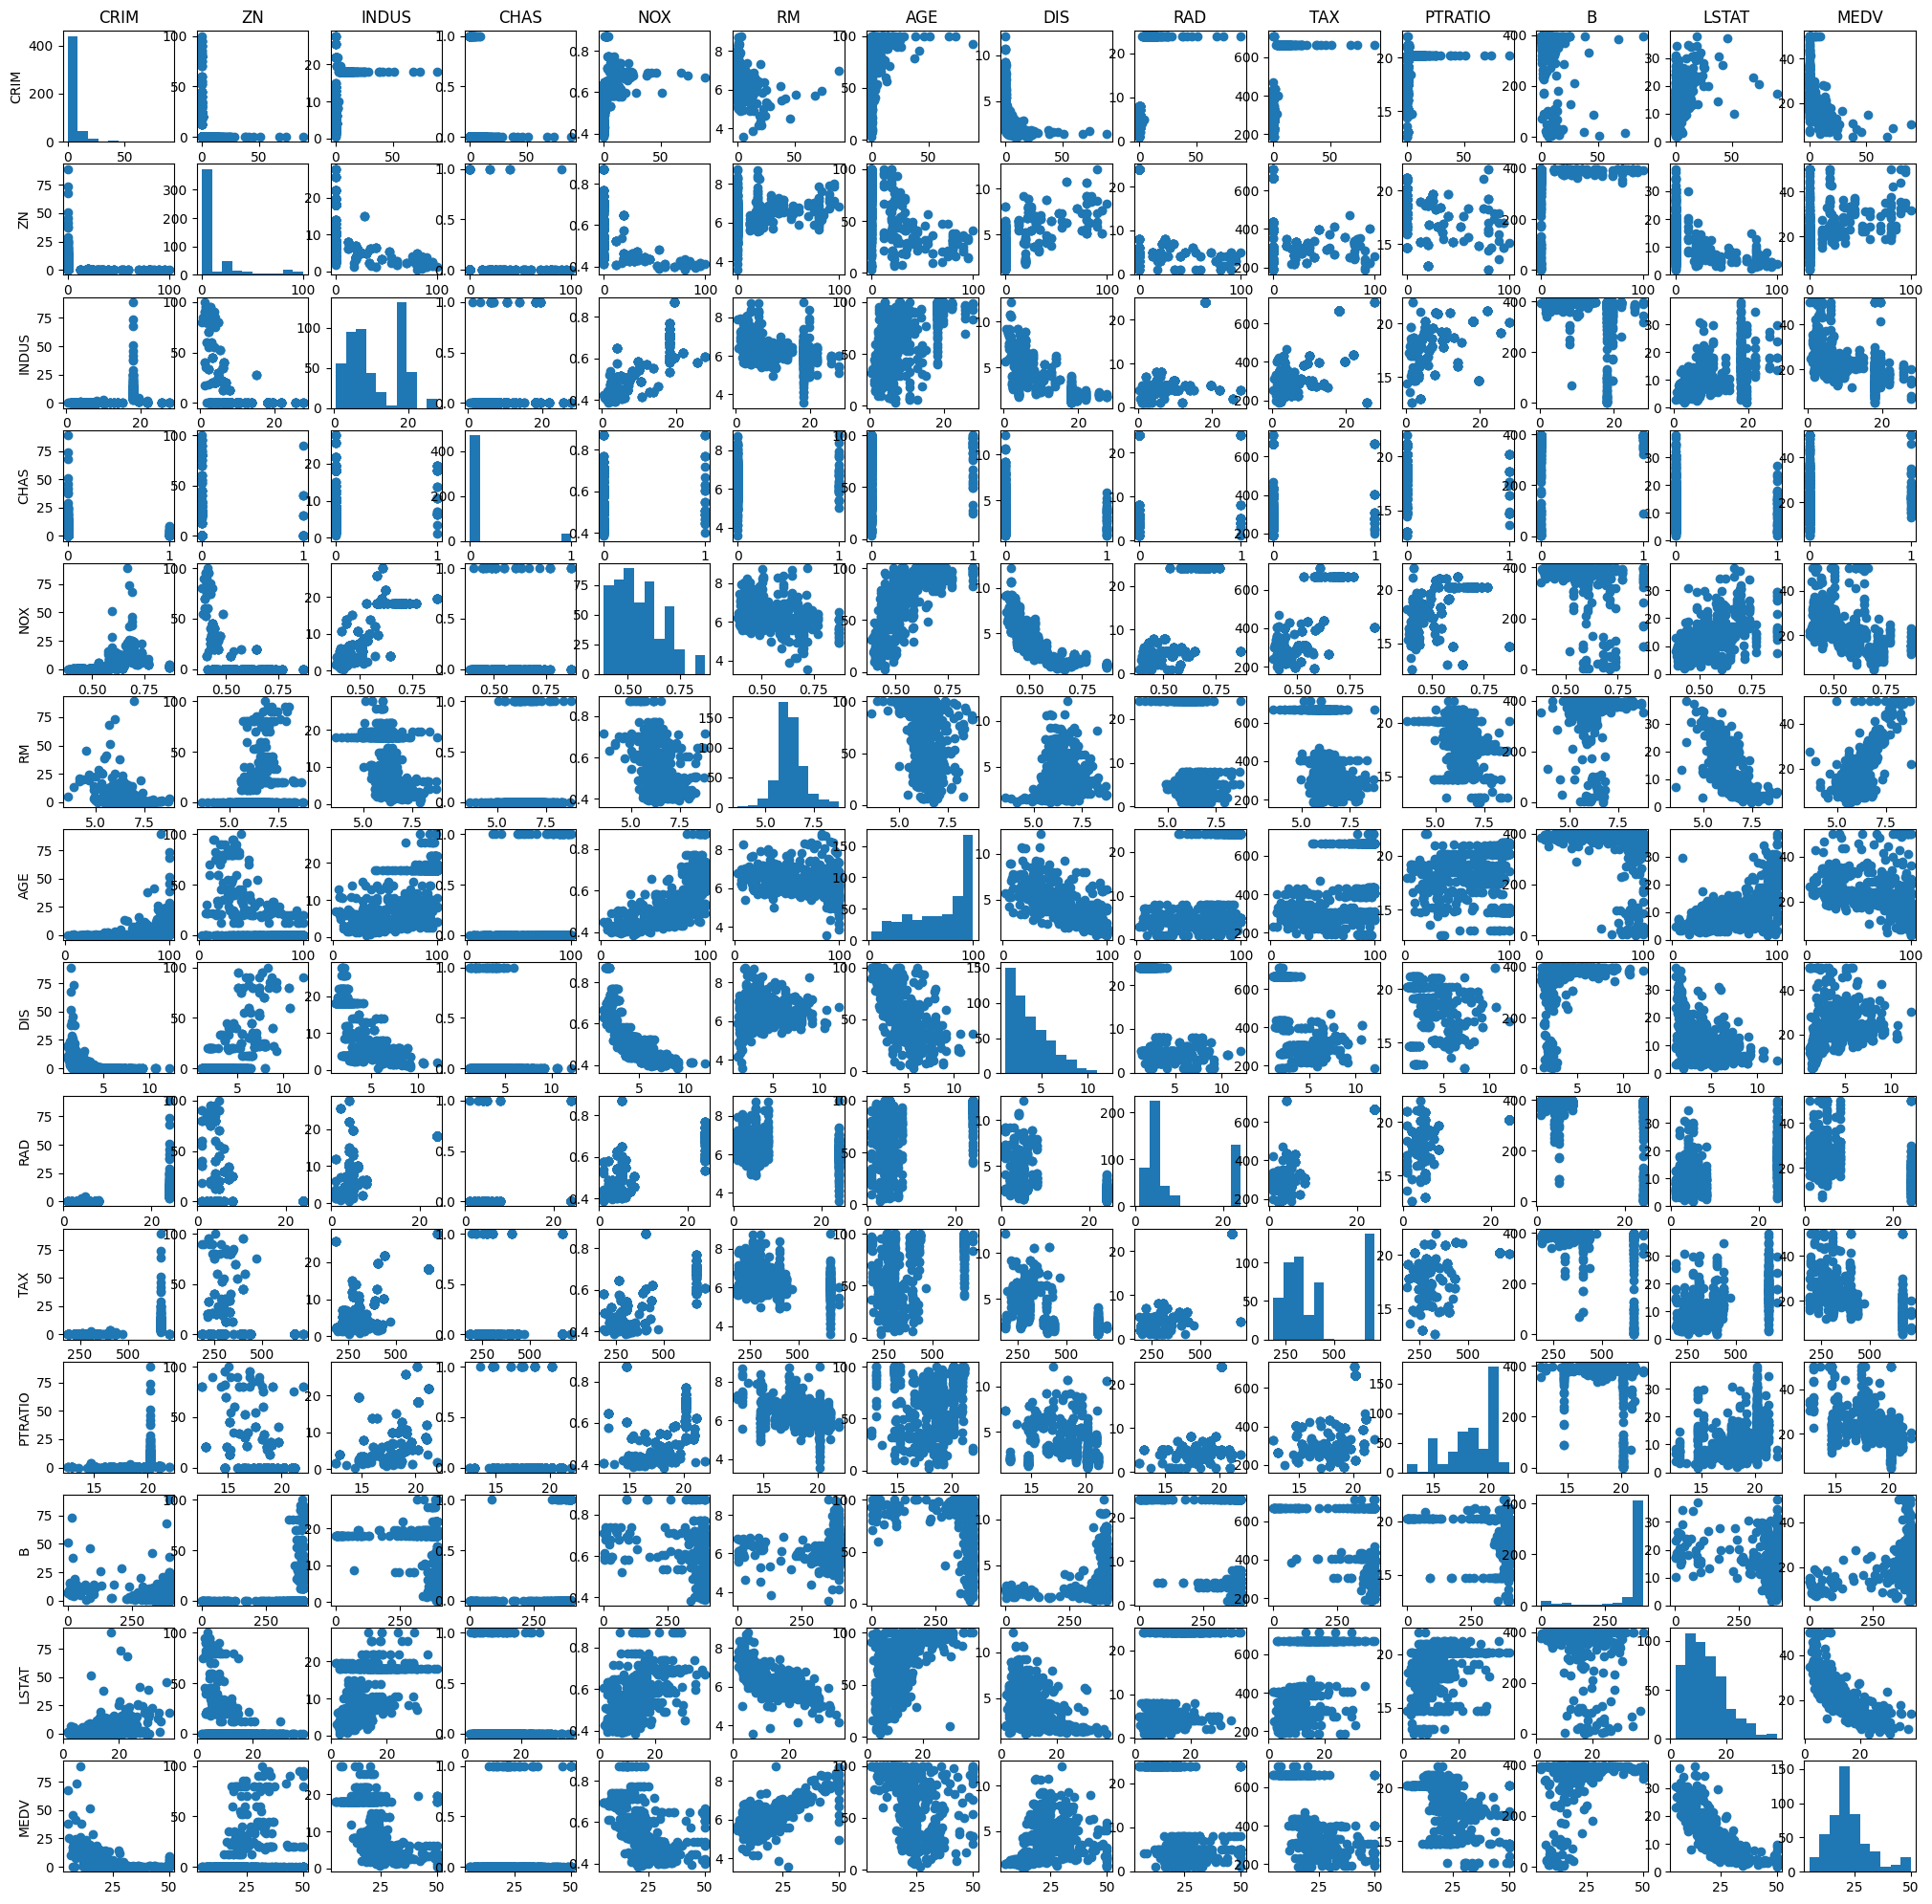

In [13]:
fig, axs = plt.subplots(len(column_names), len(column_names), figsize=(25, 25))

for i in range(len(column_names)):
  for j in range(len(column_names)):
    if i != j:
      axs[i,j].scatter(dataset[column_names[i]], dataset[column_names[j]])
    else:
      axs[i,j].hist(dataset[column_names[i]])
    axs[0,j].set_title(column_names[j])
  axs[i,0].set(ylabel=column_names[i])

plt.show()

### Your observations:
*Make some notes on what you can observe in the plot. E.g. positive-, negative correlation, value ranges, outliers. Have a look at the variables explanation above as well. Can you explain some of your observations?*


## Regression by hand

After we now got aquainted with the data we have, let's start with a simple linear regression. By simple we mean using only one of the variable to predict a target variable. This enables us to visualize everything in 2D.
Remember that with linear regression we assume the output to be a linear function of the input.

Based on your observations above choose two variables that you assume to have a linear dependence. Fill the variable names in the cell below and have a closer look:

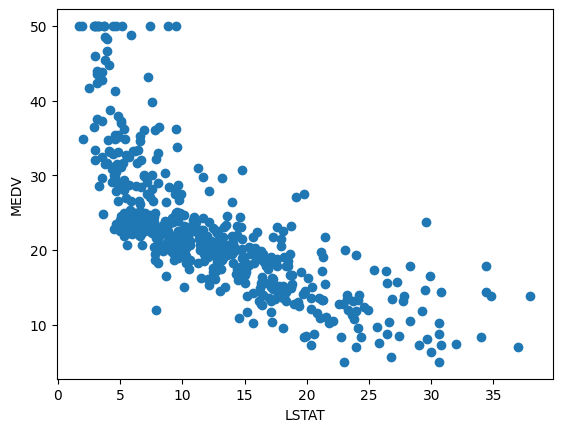

In [14]:
predictor = 'LSTAT' #TODO: fill in a column name
target = 'MEDV' #TODO: fill in a column name

X = np.array(dataset[predictor].tolist()).reshape(-1, 1)
y = np.array(dataset[target].tolist()).reshape(-1, 1)

plt.scatter(X, y)
plt.xlabel("Predictor")
plt.ylabel("Target")
plt.show()

Try to fit a line through the datapoints by filling in the weight and bias variables in the code cell below.

Remember, that a line is defined by m*x+b where m is the weight or slope of the line and the bias term b where the line cuts the y-axis (x=0). A positive value for m means the line goes 'up' the larger x gets; a negative value has the line go 'down'. If you are unsure, just play around with the values in the code cell and see what happens.

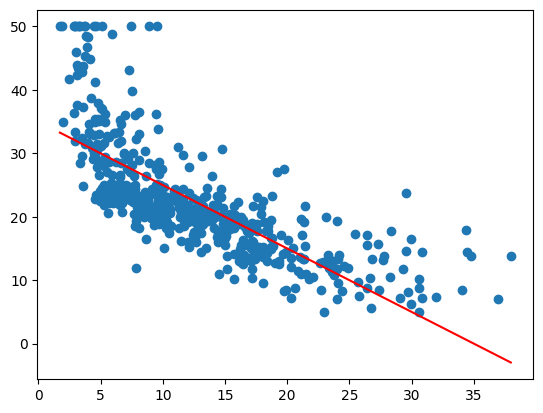

In [15]:
# Have a try at guessing the best line
weight = -1 #TODO: fill in a number
bias = 35 #TODO: fill in a number

lineStart_hand = X.min() * weight + bias
lineEnd_hand = X.max() * weight + bias

plt.scatter(X, y)
plt.plot([X.min(), X.max()], [lineStart_hand, lineEnd_hand], color = 'r')
plt.show()

### Evaluation

Of course we need to evaluate how well the line is fitted to the data. To do that we use $R^2$.

The coefficient of determination $R^2$ is defined as $(1 - \frac{u}{v})$
, where $u$ is the residual sum of squares
```((y_true - y_pred)** 2).sum()```
and $v$ is the total sum of squares
```((y_true - y_true.mean()) ** 2).sum()```.
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of 0.0.

(from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
score(X, y, sample_weight=None) )

In [41]:
def reg_score(X, y, weight, bias):
  # u = ((y_true - y_pred)** 2).sum()
  u_f = lambda X, y: (y - (X * weight + bias))**2

  u = u_f(X, y).sum(axis=0)
  # v = ((y_true - y_true.mean()) ** 2).sum()
  v = ((y - y.mean()) ** 2).sum(axis=0)

  r = 1 - (u/v)

  return r


def mse(X, y, weight, bias):
    mse = np.power((X * weight + bias)-y, 2)
    mse = mse.sum(axis=0)

    return mse/X.shape[0]


In [42]:
print(reg_score(X, y, weight, bias))
print(mse(X, y, weight, bias))

[0.54223286]
[38.64449862]


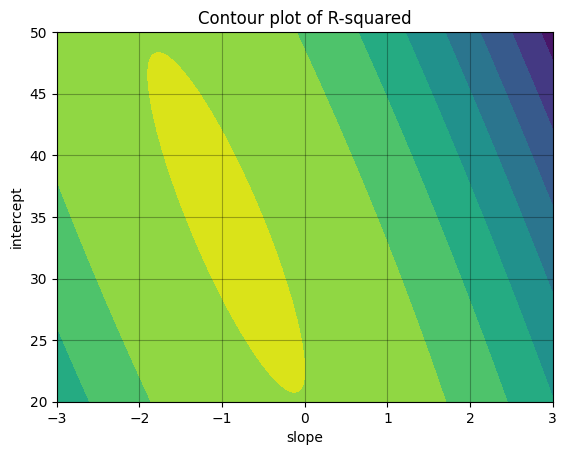

In [36]:
ws = np.linspace(-3, 3, 100) #slope range
bs = np.linspace(20, 50, 100) #intercept
WS, BS = np.meshgrid(ws, bs)

Z = reg_score(X, y, WS.flatten(), BS.flatten())

fig, ax = plt.subplots()
cs = ax.contourf(WS, BS, Z.reshape(WS.shape))
ax.grid(c='k', ls='-', alpha=0.3)
ax.set_title('Contour plot of R-squared')
ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
plt.show()

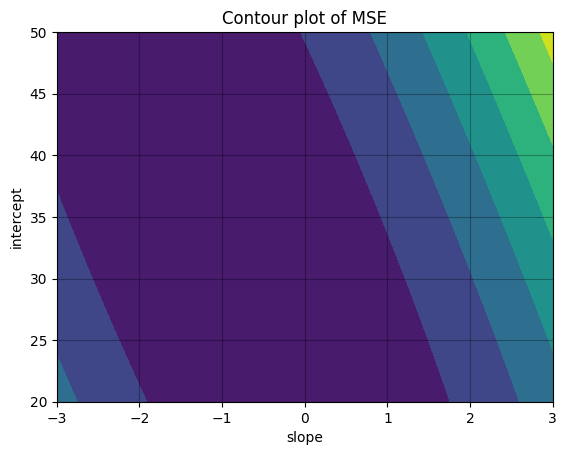

In [43]:
Z = mse(X, y, WS.flatten(), BS.flatten())

fig, ax = plt.subplots()
cs = ax.contourf(WS, BS, Z.reshape(WS.shape))
ax.grid(c='k', ls='-', alpha=0.3)
ax.set_title('Contour plot of MSE')
ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
plt.show()


TODO: add contour plot here

Try again a few times and see if you can get a better fit...
If you are sattisfied that you cannot improve lets try it using the SKlearn function:

In [45]:
reg = LinearRegression().fit( X, y)

In [10]:
# The coefficients
print(f"Coefficient: {reg.coef_.item()} ; Interceptor:{reg.intercept_}")
print("with score: ", reg.score(X, y))

Coefficient: -0.9500493537579906 ; Interceptor:[34.55384088]
with score:  0.5441462975864797


How does your score compare to your best try? How about the comparison of the lines in the plot below? Does it make sense which one is better?

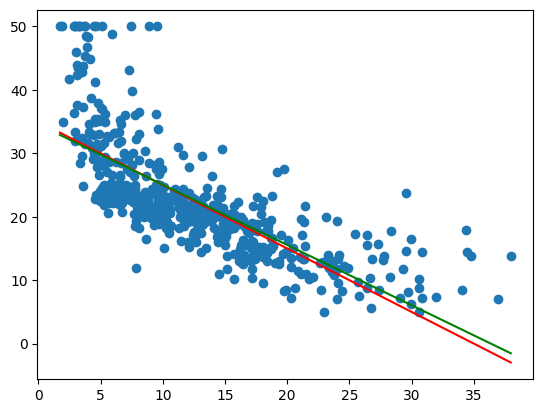

In [11]:
lineStart = X.min() * reg.coef_[0] + reg.intercept_
lineEnd = X.max() * reg.coef_[0] + reg.intercept_

plt.scatter(X, y)
plt.plot([X.min(), X.max()], [lineStart_hand, lineEnd_hand], color = 'r')
plt.plot([X.min(), X.max()], [lineStart, lineEnd], color = 'g')
plt.show()

## Residual analysis

Let' have a closer look at the fitted line using the so called residuals. With that we can analyse the part of the data that is not explained by the model.

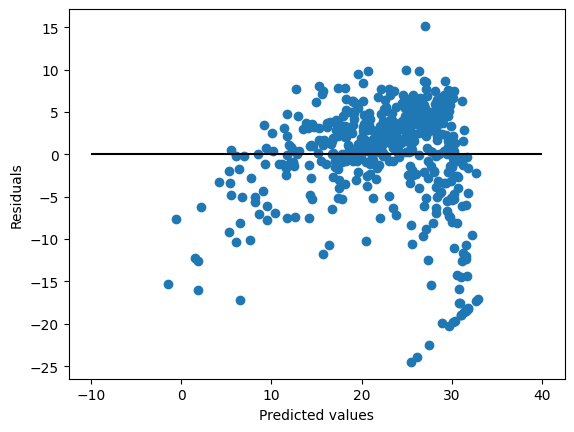

In [48]:
pred = reg.predict(X)
plt.scatter(pred, pred - y)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y=0, xmin=-10, xmax=40, color='black')
plt.show()

If we would have a perfect fit of our model the residuals would all be zero. As this never happens the residuals should be randomly scattered around 0. If you can observe any pattern in the residual plot it is an indication that there is some information present in the data that our model can not capture.
We can also use the residual plot to identify outliers in our data which are far away from the center line.

## More complex example

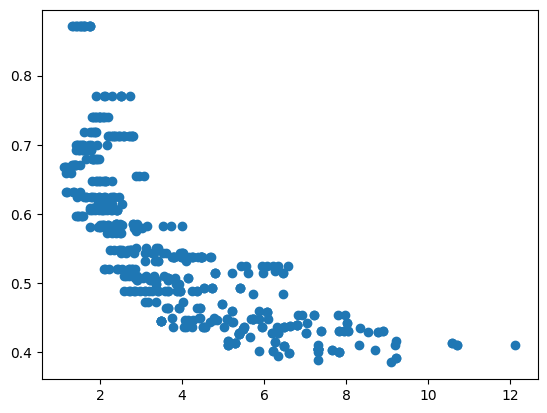

In [12]:
X = np.array(dataset['DIS'].tolist()).reshape(-1, 1)
y = np.array(dataset['NOX'].tolist()).reshape(-1, 1)

plt.scatter(X, y)
plt.show()

## Multivariate regression

As we just saw just one variable is not always a good predictor. If you think about it it makes sense as life is complicated.

In [18]:
input_columns = ['DIS', 'LSTAT']
X = np.array(dataset[input_columns].values)
y = np.array(dataset['MEDV'].tolist()).reshape(-1, 1)

slopes = [0.6, -1]
intercept = 38

line_min = X[:,0].min() * slopes[0] + X[:,1].min() * slopes[1] + intercept
line_max = X[:,0].max() * slopes[0] + X[:,1].max() * slopes[1] + intercept

line_df = pd.DataFrame(data =[[X[:,0].min(), X[:,1].min(), line_min], [X[:,0].max(), X[:,1].max(), line_max]] , columns=['DIS', 'LSTAT', 'MEDV'])
fig = px.line_3d(line_df , x='DIS', y='LSTAT', z='MEDV')
fig.add_scatter()

fig.add_trace(go.Scatter3d(x=dataset[input_columns[0]], y=dataset[input_columns[1]], z=dataset['MEDV'], mode='markers'))
fig.update_traces(line_color='red', marker=dict(color='blue'))

fig.show()

In [27]:
reg = LinearRegression().fit( X, y)

# The coefficients
print(f"Coefficient: {reg.coef_[0]} ; Interceptor:{reg.intercept_}")
print("with score: ", reg.score(X, y))

line_min = X[:,0].min() * slopes[0] + X[:,1].min() * slopes[1] + intercept
line_max = X[:,0].max() * slopes[0] + X[:,1].max() * slopes[1] + intercept

line_min_model = X[:,0].min() * reg.coef_[0][0] + X[:,1].min() * reg.coef_[0][1] + intercept
line_max_model = X[:,0].max() * reg.coef_[0][0] + X[:,1].max() * reg.coef_[0][1] + intercept

line_df = pd.DataFrame(data =[[X[:,0].min(), X[:,1].min(), line_min, 'hand guess'], [X[:,0].max(), X[:,1].max(), line_max, 'hand guess'], [X[:,0].min(), X[:,1].min(), line_min_model, 'model'], [X[:,0].max(), X[:,1].max(), line_max_model, 'model']] , columns=['DIS', 'LSTAT', 'MEDV', 'line'])
fig = px.line_3d(line_df , x='DIS', y='LSTAT', z='MEDV', line_group='line', color='line')

fig.add_trace(go.Scatter3d(x=dataset[input_columns[0]], y=dataset[input_columns[1]], z=dataset['MEDV'], mode='markers', name='data'))
fig.update_traces(marker=dict(color='blue'))

fig.show()

Coefficient: [-0.67683249 -1.04923978] ; Interceptor:[38.3775118]
with score:  0.5622284255429311


## Feature Engenering